<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_2_Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2 - Differentiation

This notebook contains the code for the example problems found in Chapter 2.

Example 2.1: Light intensity from a single slit

---------------------------- CODE OUTPUT ----------------------------- 

The First derivative dI/dp is: 

2*sin(p)*cos(p)/p**2 - 2*sin(p)**2/p**3
The Second derivative of I(p) is:
2*(-sin(p)**2 + cos(p)**2 - 4*sin(p)*cos(p)/p + 3*sin(p)**2/p**2)/p**2


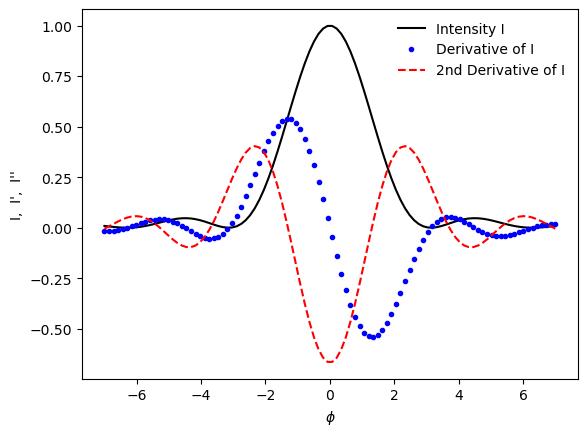

In [ ]:
from sympy import symbols, sin, diff
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

print('-'*28,'CODE OUTPUT','-'*29,'\n')

p = symbols('p',real=True)          # define symbols, p=phase phi

intensity = lambdify(p,sin(p)**2/p**2)   # light intensity I(p)
deriv = lambdify(p,diff(sin(p)**2/p**2,p))          # derivative dI/dp
secondDeriv = lambdify(p,diff(sin(p)**2/p**2,p,p))  # derivative of I(p)

phase = np.linspace(-7,7,100)                       # phase angle p

# plot I(p), dI/dp and second derivative together
plt.plot(phase,intensity(phase),'k-',label='Intensity I')
plt.plot(phase,deriv(phase),'b.',label='Derivative of I')
plt.plot(phase,secondDeriv(phase),'r--',label='2nd Derivative of I')

plt.xlabel(r'$\phi$')
plt.ylabel("I,  I',  I''")
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

f1 = diff(sin(p)**2/p**2,p)
print('The First derivative dI/dp is:','\n')
print(f1)

f2 = diff(sin(p)**2/p**2,p,p)
print('The Second derivative of I(p) is:')
print(f2)

plt.show()

Example 2.2: The chain rule

In [ ]:
from sympy import  symbols, diff, sin

x, b = symbols('x, b',real=True)
print('-'*28,'CODE OUTPUT','-'*29,'\n')

s = diff(sin(b*sin(x))/(b*sin(x)),x)

print('Derivative of E-field  is = ')
print(s)

---------------------------- CODE OUTPUT ----------------------------- 

Derivative of E-field  is = 
cos(x)*cos(b*sin(x))/sin(x) - sin(b*sin(x))*cos(x)/(b*sin(x)**2)


Example 2.3: Falling object with air resistance

---------------------------- CODE OUTPUT ----------------------------- 

v(t)= (b*v0 + g*m*exp(b*t/m) - g*m)*exp(-b*t/m)/b 

a(t)= (-b*v0 + g*m)*exp(-b*t/m)/m


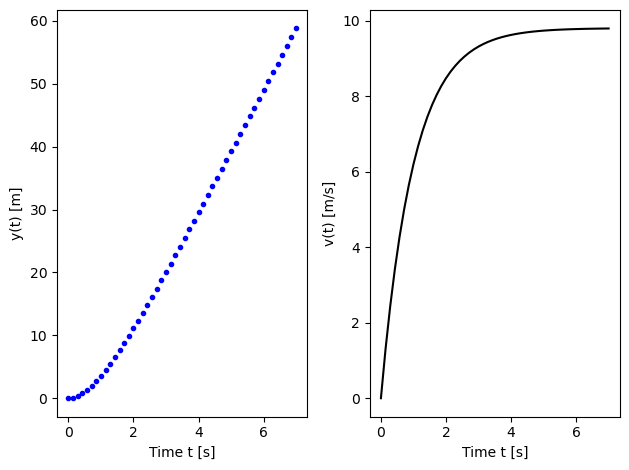

In [ ]:
from sympy import symbols, exp, diff, simplify
import numpy as np
import matplotlib.pyplot as plt
print('-'*28,'CODE OUTPUT','-'*29,'\n')

t, y0, m, v0, b, g = symbols('t,y0,m,v0,b,g',real=True)   # symbols

v = diff(y0+m*g*t/b+(m**2*g/b**2-m*v0/b)*(exp(-b*t/m)-1),t) # speed v(t)
print('v(t)=',simplify(v),'\n')

a = diff(v,t)                 # acceleration a(t)
print('a(t)=',simplify(a))

b, m, g, v0, y0 = 1.0, 1, 9.8, 0, 0 # numerical values for the plots

tims = np.linspace(0,7,50)  # times t to be evaluated

yt = y0+m*g*tims/b+(m**2*g/b**2-m*v0/b)*(np.exp(-b*tims/m)-1) #array y(t)
vt = (b*v0 + g*m*np.exp(b*tims/m) - g*m)*np.exp(-b*tims/m)/b #array v(t)

plt.subplot(1,2,1)
plt.plot(tims, yt, 'b.')
plt.xlabel('Time t [s]')
plt.ylabel('y(t) [m]')

plt.subplot(1,2,2)
plt.plot(tims, vt, 'k')
plt.xlabel('Time t [s]')
plt.ylabel('v(t) [m/s]')
plt.tight_layout()
plt.show()

Example 2.4: The Lennard-Jones potential

---------------------------- CODE OUTPUT ----------------------------- 

Force= -6/x**7 + 12/x**13
Force=0 at x= 1.122  m


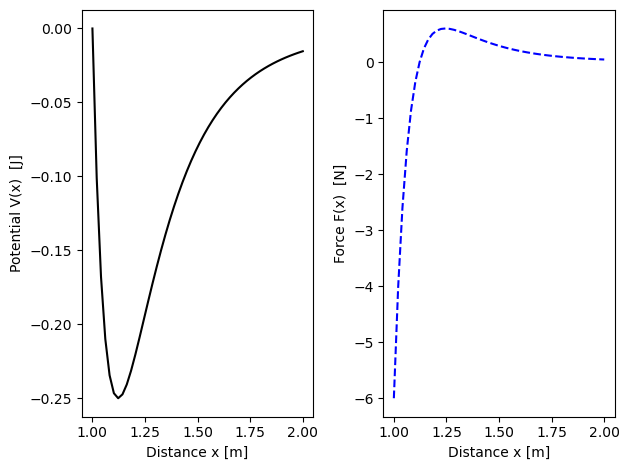

In [ ]:
from sympy import symbols, diff
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = symbols('x',real=True)     # define symbols
F = -diff(((x**-12)-(x**-6)),x)  # evaluate F=-dV/dx symbolically
print('Force=',F)

force = lambda x: -12/x**13 + 6/x**7  # create function F(x)
print("Force=0 at x=",np.round(fsolve(force,1)[0],3)," m")

x = np.linspace(1,2,50)        # evalate positions x

# plot V(x) and F(x)using subplots
plt.subplot(1,2,1)
plt.plot(x, (x**-12)-(x**-6), 'k')
plt.xlabel('Distance x [m]')
plt.ylabel('Potential V(x)  [J]')

plt.subplot(1,2,2)
plt.plot(x,-12/x**13 + 6/x**7, 'b--')
plt.xlabel('Distance x [m]')
plt.ylabel('Force F(x)  [N]')
plt.tight_layout()
plt.show()

Example 2.5: Most probable speed in the Maxwell-Boltzmann distribution

---------------------------- CODE OUTPUT ----------------------------- 

Symbolic vp from SymPy =  sqrt(2)*sqrt(T)*sqrt(k)/sqrt(m)
Numerical vp from SymPy =  1116.405  m/s
Numerical vp using fsolve command: 1116.405  m/s


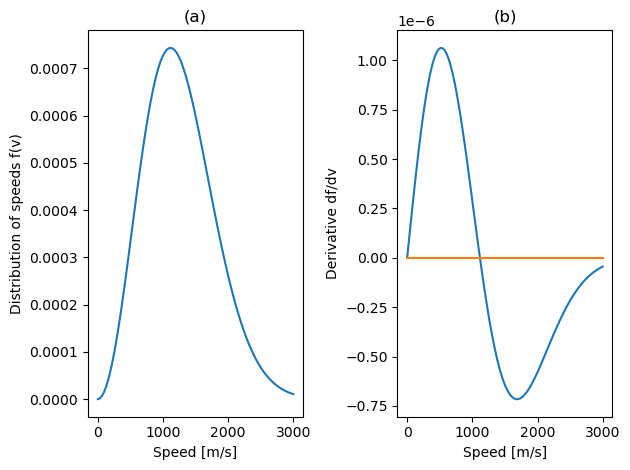

In [ ]:
from sympy import symbols, pi, sqrt, exp, diff, Eq, solve
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
print('-'*28,'CODE OUTPUT','-'*29,'\n')

v, m, k, T = symbols('v,m,k,T',positive=True)  # define symbols

f1 = sqrt(2/pi*((m/(k*T))**3))*v**2*exp(-m*v**2/(2*k*T))

deriv = diff(f1,v)
eq1 = Eq(deriv,0)
vp = solve(eq1,v)[0]  # solve symbolically df/dv=0
print("Symbolic vp from SymPy = ",vp)

# Plot MB distribution of speeds for Helium
m = 6.6464731e-27  # atomic mass Helium in kg
T = 300            # room temperature in K
k = 1.380649e-23   # Boltzmann constant in J/K
print("Numerical vp from SymPy = ",round(np.sqrt(2*k*T/m),3)," m/s")

v1 = np.linspace(1,3000,100)  # define values of v for x-axis

a = np.sqrt(2/np.pi*((m/(k*T))**3))
b = m/(2*k*T)
f = lambda v: a*v**2*np.exp(-b*v**2)   # define function for f(v)

# define function for derivative df/dv
der = lambda v: np.sqrt(2)*m**(3/2)*v*(2*T*k - m*v**2)*\
    np.exp(-m*v**2/(2*T*k))/(np.sqrt(np.pi)*T**(5/2)*k**(5/2))

plt.subplot(1,2,1)
plt.plot(v1,f(v1))
plt.title('(a)')
plt.xlabel('Speed [m/s]')
plt.ylabel('Distribution of speeds f(v)')

plt.subplot(1,2,2)
plt.plot(v1,der(v1))
plt.title('(b)')
plt.xlabel('Speed [m/s]')
plt.ylabel('Derivative df/dv')
plt.plot(v1,[0]*len(v1))

vp=np.round(fsolve(der,1000)[0],3)
print("Numerical vp using fsolve command:",vp," m/s")
plt.tight_layout()
plt.show()

Example 2.6: The 1D Schrodinger equation

In [ ]:
from sympy import symbols, exp, diff, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, m, omeg, hbar, A = symbols('x,m,omeg,hbar,A',positive=True)  # symbols

psi = A*exp(-m*omeg*x**2/(2*hbar))  # wave function

lhs = -(hbar**2)/(2*m)*diff(psi,x,x)+m*omeg**2*x**2*psi/2
print('LHS of Scrodinger Equation = ',simplify(lhs))

rhs = hbar*omeg*psi/2
print('RHS of Scrodinger Equation = ',simplify(rhs))

---------------------------- CODE OUTPUT ----------------------------- 

LHS of Scrodinger Equation =  A*hbar*omeg*exp(-m*omeg*x**2/(2*hbar))/2
RHS of Scrodinger Equation =  A*hbar*omeg*exp(-m*omeg*x**2/(2*hbar))/2


Example 2.7: Planck's law of black-body radiation

---------------------------- CODE OUTPUT ----------------------------- 

Derivative df/dv= x**5*exp(x)/(exp(x) - 1)**2 - 5*x**4/(exp(x) - 1) 

Numerator of derivative df/dv= x**4*(x*exp(x) - 5*exp(x) + 5) 

df/dv=0 at x= 4.9651


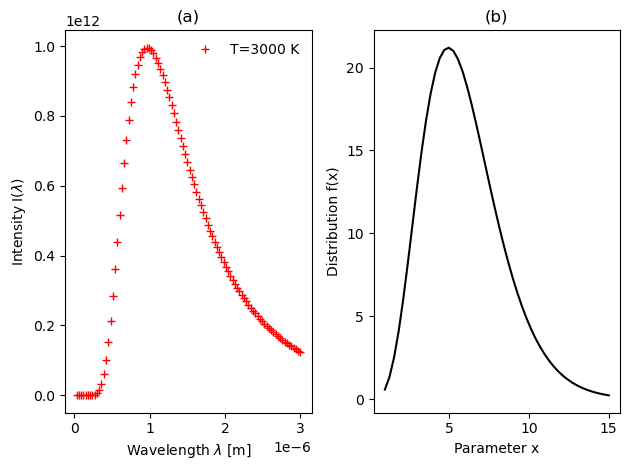

In [ ]:
from sympy import symbols, exp, diff, fraction, simplify
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x = symbols('x',real=True)                  # define symbols

fv = (x**5)/(exp(x)-1)                      # light intensity I(x)
dfdv = -diff(fv,x)                          # evaluate dI/dx
print('Derivative df/dv=',dfdv,'\n')

numerator = fraction(simplify(dfdv))[0]     # find numerator only
print('Numerator of derivative df/dv=',numerator,'\n')

num = lambda x: x**4*(x*np.exp(x) - 5*np.exp(x) + 5)
# define function df/dv
print("df/dv=0 at x=",np.round(fsolve(num,6)[0],4))

h = 6.626e-34    # Planck constant in J s
k = 1.380649e-23 # Boltzmann constant in J/K
c = 2.998e8      # speed of light m/s
T = 3000         # Temperature in K

# define I(wavelength)
f = lambda x: (2*h*c**2.0/x**5.0)*1/(np.exp(h*c/(x*k*T))-1)

x1 = np.linspace(3e-8,3e-6,100)  # wavelength values for plot

plt.subplot(1,2,1)
plt.plot(x1,f(x1),'r+',label='T=3000 K')
plt.xlabel('Wavelength $\lambda$ [m]')
plt.ylabel(r'Intensity I(${\lambda}$)')
plt.title('(a)')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

f = lambda x: (x**5)/(np.exp(x)-1)  # define I(x)
x = np.linspace(1,15,50)            # x values for plot

plt.subplot(1,2,2)
plt.plot(x, f(x), 'k')
plt.xlabel('Parameter x')
plt.ylabel('Distribution f(x)')
plt.title('(b)')
plt.tight_layout()
plt.show()

In [ ]:
from sympy import nsolve, symbols, exp
x = symbols('x')                          # define symbol x

root = nsolve(5*(exp(x)-1)-x*exp(x),x,5)  # equation to solve
# another method for solving the transcedental equation

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('Solution of transcedental equation:  x = ',root)

---------------------------- CODE OUTPUT ----------------------------- 

Solution of transcedental equation:  x =  4.96511423174428


Example 2.8: Calculating partial derivatives

In [ ]:
from sympy import symbols, sin, diff
x, y, c = symbols('x,y, c')

T = c*sin(x*y)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('Second partial with respect to x = ', diff(T,x,2))
print('Second partial with respect to x,y = ',diff(T,x,y))
print('3rd partial with respect to x,x,y = ',diff(T,x,x,y))


---------------------------- CODE OUTPUT ----------------------------- 

Second partial with respect to x =  -c*y**2*sin(x*y)
Second partial with respect to x,y =  c*(-x*y*sin(x*y) + cos(x*y))
3rd partial with respect to x,x,y =  -c*y*(x*y*cos(x*y) + 2*sin(x*y))


Example 2.9: The entropy of a monatomic ideal gas

In [ ]:
from sympy import symbols, diff, pi, log
print('-'*28,'CODE OUTPUT','-'*29,'\n')

N,  k, V, m, U, h, dV, dU= symbols('N,  k, V, m, U, h, dV, dU',\
real=True)
#  define symbols

S = N*k* (log((V/N)* ((4*pi*m*U/(3*N*h**2))**(3/2))) +5/2)

dS = diff(S,V)*dV +diff(S,U)*dU
print('dS=', dS)

---------------------------- CODE OUTPUT ----------------------------- 

dS= 1.0*N*dV*k/V + 1.5*N*dU*k/U


Example 2.10: Temperature changes in a rectangular plate

In [ ]:
from sympy import symbols, diff, sin, exp
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, a, b, c, t = symbols('x,y,a,b,c,t')

T = a*x**2*t*sin(y)
x_fcn = c*t**2
y_fcn = b*exp(2*t)

print('The total derivative dT/dt is:')
diff(T.subs([(x,x_fcn),(y,y_fcn)]),t)

---------------------------- CODE OUTPUT ----------------------------- 

The total derivative dT/dt is:


2*a*b*c**2*t**5*exp(2*t)*cos(b*exp(2*t)) + 5*a*c**2*t**4*sin(b*exp(2*t))

In [ ]:
from sympy import Function, symbols, Derivative, sin
import textwrap

a, t = symbols('a, t')
x = Function('x')(t)
y = Function('y')(t)

T = a*x**2*t*sin(y)
deriv = str(Derivative(T,t).doit())

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The total derivative dT/dt is: ')
print(textwrap.fill(deriv,80))

---------------------------- CODE OUTPUT ----------------------------- 

The total derivative dT/dt is: 
a*t*x(t)**2*cos(y(t))*Derivative(y(t), t) +
2*a*t*x(t)*sin(y(t))*Derivative(x(t), t) + a*x(t)**2*sin(y(t))


Example 2.11: Moment of inertia

In [ ]:
from sympy import symbols, diff, solve
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, m = symbols('x,y,m')  # define symbols

I = m*((x-1)**2+y**2)+(m/2)*(x**2-(y-1)**2)+2*m*((x-2)**2+(y-2)**2)
# I=sum of three terms m*r**2, one for each mass

diff_I_x = diff(I,x)     # find partial dI/dx
diff_I_y = diff(I,y)     # find partial dI/dy


# solve system of equations dI/dx=0, dI/dy=0 usin solve()
print('The coordinates of location P are:')
solve([diff_I_x, diff_I_y])

---------------------------- CODE OUTPUT ----------------------------- 

The coordinates of location P are:


[{x: 10/7, y: 7/5}]

Example 2.12: Calculating a Maclaurin series

In [ ]:
from sympy import log, series, Symbol

x = Symbol('x')
maclaurin = series( log( 1/(1+x) ), x, x0 = 0, n = 5)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The Maclaurin series for f is: ',maclaurin)

---------------------------- CODE OUTPUT ----------------------------- 

The Maclaurin series for f is:  -x + x**2/2 - x**3/3 + x**4/4 + O(x**5)


Example 2.13: The displacement of a falling body experiencing air resistance

In [ ]:
from sympy import exp, symbols, series

m, g, b, t = symbols('m, g, b, t')
y = m*g/b * t - g*m**2/b**2 *(1 - exp(-b*t/m))

maclaurin = series(y, t, x0 = 0, n = 4)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The Maclaurin series for x(t) is: ',maclaurin)

---------------------------- CODE OUTPUT ----------------------------- 

The Maclaurin series for x(t) is:  g*t**2/2 - b*g*t**3/(6*m) + O(t**4)


Example 2.14: The temperature of a metal disk

In [ ]:
from sympy import symbols, series, exp, diff

a, sigma, x, y = symbols('a,sigma,x,y')

T = a*exp(-sigma*(x**2+y**2))

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('Partial of T with respect to x = \n', diff(T,x))
print('\nPartial of T with respect to y = \n', diff(T,y))
print('\nSecond Partial of T with respect to x = \n', diff(T,x,x))
print('\nSecond Partial of T with respect to y = \n', diff(T,y,y))
print('\nSecond Partial of T with respect to x and y = \n', diff(T,x,y))

---------------------------- CODE OUTPUT ----------------------------- 

Partial of T with respect to x = 
 -2*a*sigma*x*exp(-sigma*(x**2 + y**2))

Partial of T with respect to y = 
 -2*a*sigma*y*exp(-sigma*(x**2 + y**2))

Second Partial of T with respect to x = 
 2*a*sigma*(2*sigma*x**2 - 1)*exp(-sigma*(x**2 + y**2))

Second Partial of T with respect to y = 
 2*a*sigma*(2*sigma*y**2 - 1)*exp(-sigma*(x**2 + y**2))

Second Partial of T with respect to x and y = 
 4*a*sigma**2*x*y*exp(-sigma*(x**2 + y**2))


Example 2.15: Calculating derivatives from data

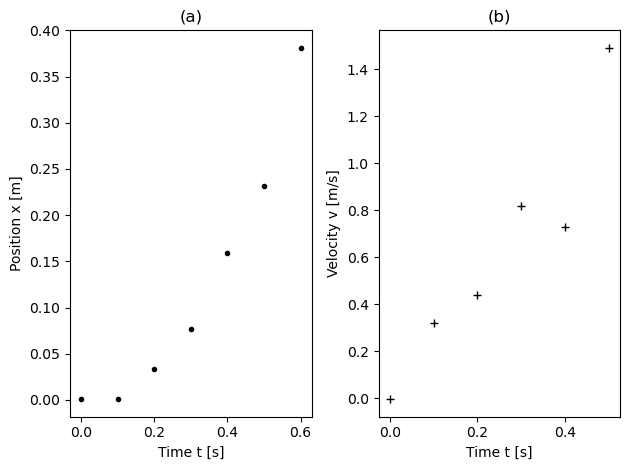

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  # time data t
x = [0.00119, 0.00088, 0.0331, 0.0770, 0.159, 0.232, 0.381]
# position data x

delta_t = 0.1    # time interval

v = [(x[i+1] - x[i])/delta_t for i in range(0,len(x)-1)]
# use list comprehension to find v

plt.subplot(1,2,1)
plt.plot(t,x, 'k.')
plt.xlabel('Time t [s]')
plt.ylabel('Position x [m]')
plt.title('(a)')

plt.subplot(1,2,2)
plt.plot(t[:-1],v, 'k+')
plt.xlabel('Time t [s]')
plt.ylabel('Velocity v [m/s]')
plt.title('(b)')
plt.tight_layout()
plt.show()